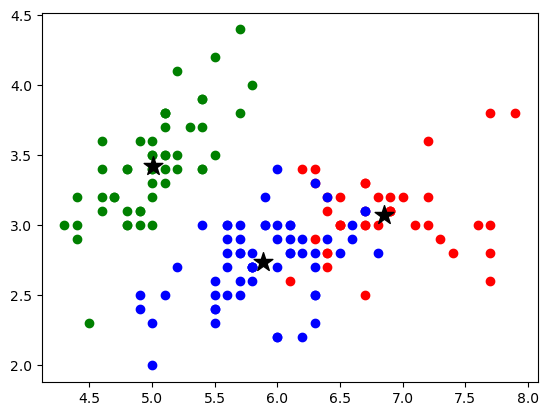

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Set the number of clusters
K = 3

# Initialize centroids randomly
centroids = X[np.random.choice(range(len(X)), K, replace=False)]

# Initialize the cluster labels and distances
labels = np.zeros(len(X))
distances = np.zeros((len(X), K))

# Iterate until convergence
while True:
    # Compute the distance between each point and each centroid
    for i in range(K):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        
    # Assign each point to the closest centroid
    new_labels = np.argmin(distances, axis=1)
    
    # Check for convergence
    if np.array_equal(labels, new_labels):
        break
        
    # Update the cluster labels and centroids
    labels = new_labels
    for i in range(K):
        centroids[i] = np.mean(X[labels == i], axis=0)

# Plot the results
colors = ['r', 'g', 'b']
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')
plt.show()


In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

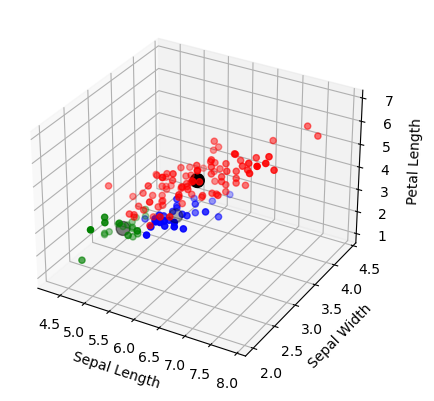

In [28]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# load iris dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
X = data.iloc[:, :-1].values

# k-means clustering function
def kmeans(X, k, max_iter=5):
    # initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k), :]
    
    for i in range(max_iter):
        # calculate distances to centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # assign clusters to data points
        clusters = np.argmin(distances, axis=0)
                
        # update centroids
        for j in range(k):
            centroids[j] = np.mean(X[clusters == j], axis=0)
    
    return clusters, centroids

# run k-means with k=3
clusters, centroids = kmeans(X, k=3)

# plot the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(X[clusters==i, 0], X[clusters==i, 1], X[clusters==i, 2], c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', s=100)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.savefig('kmeans_scratch.png')
plt.show()

In [27]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
